In [1]:
import pandas as pd
import numpy as np

In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income Range']

In [3]:
adult = pd.read_csv('Datasets/adult.data', names=names)
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income Range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
adult.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income Range      0
dtype: int64

In [5]:
adult['Income Range'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income Range, dtype: int64

In [6]:
temp = pd.DataFrame()
temp = temp.append(adult[adult['Income Range'] == ' >50K'])
temp = temp.append(adult[adult['Income Range'] == ' >50K'])
adult = adult.append(temp)

In [7]:
adult['Income Range'].value_counts()

 <=50K    24720
 >50K     23523
Name: Income Range, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(adult.drop('Income Range', axis=1), 
                                                              adult['Income Range'], test_size=0.10, random_state=42)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42)

In [11]:
numerical_attributes = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 
                        'hours-per-week']

categorical_attributes = ['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                         'race', 'sex', 'native-country']

In [12]:
len(numerical_attributes), len(categorical_attributes)

(6, 8)

In [13]:
X_train.shape[0], X_valid.shape[0], X_test.shape[0]

(34734, 8684, 4825)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [15]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()) 
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_attributes),
    ('cat_pipeline', cat_pipeline, categorical_attributes)
])

In [16]:
transformed_data = full_pipeline.fit_transform(X_train)
transformed_data

<34734x108 sparse matrix of type '<class 'numpy.float64'>'
	with 486276 stored elements in Compressed Sparse Row format>

In [17]:
target_encoder = LabelEncoder()
transformed_target = target_encoder.fit_transform(y_train).reshape(-1 ,1)
transformed_target

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

# Using ANN

In [18]:
from tensorflow import keras

In [19]:
transformed_data.shape

(34734, 108)

In [20]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=transformed_data.shape[1]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),    
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               32700     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 233,401
Trainable params: 233,401
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [23]:
X_valid_transformed = full_pipeline.transform(X_valid)

y_valid_transformed = target_encoder.transform(y_valid).reshape(-1 ,1)

In [24]:
history = model.fit(transformed_data, transformed_target, epochs=10, 
                    validation_data=(X_valid_transformed, y_valid_transformed))

Epoch 1/10


C:\Users\juelb\anaconda3\envs\python3.9-tf2\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 300), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1086/1086 [==============================] - 22s 19ms/step - loss: 0.4647 - accuracy: 0.7884 - val_loss: 0.4064 - val_accuracy: 0.8085
Epoch 2/10
1086/1086 [==============================] - 18s 16ms/step - loss: 0.3855 - accuracy: 0.8208 - val_loss: 0.3837 - val_accuracy: 0.8198
Epoch 3/10
1086/1086 [==============================] - 18s 17ms/step - loss: 0.3717 - accuracy: 0.8282 - val_loss: 0.3769 - val_accuracy: 0.8243
Epoch 4/10
1086/1086 [==============================] - 18s 17ms/step - loss: 0.3660 - accuracy: 0.8305 - val_loss: 0.3759 - val_accuracy: 0.8240
Epoch 5/10
1086/1086 [==============================] - 19s 18ms/step - loss: 0.3623 - accuracy: 0.8324 - val_loss: 0.3733 - val_accuracy: 0.8257
Epoch 6/10
1086/1086 [==============================] - 18s 17ms/step - loss: 0.3602 - accuracy: 0.8333 - val_loss: 0.3741 - val_accuracy: 0.8250
Epoch 7/10
1086/1086 [==============================] - 18s 17ms/step - loss: 0.3575 - accuracy: 0.8340 - val_loss: 0.3697 - val_accura

In [25]:
X_test_transformed = full_pipeline.transform(X_test)
y_test_transformed = target_encoder.transform(y_test).reshape(-1, 1)

In [26]:
import matplotlib.pyplot as plt

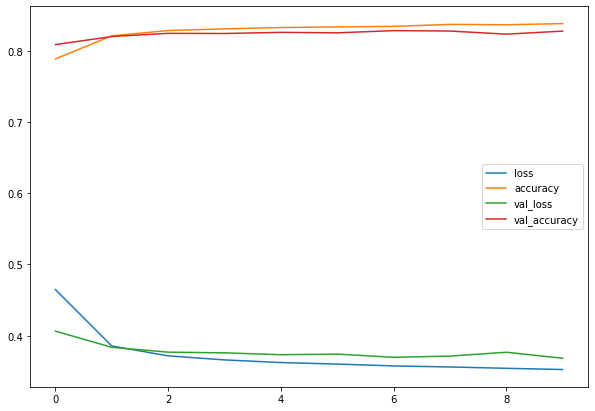

In [27]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.show()

In [28]:
model.evaluate(X_test_transformed.toarray(), y_test_transformed)

151/151 [==============================] - 2s 9ms/step - loss: 0.3462 - accuracy: 0.8396


[0.3462333381175995, 0.8395854830741882]

In [29]:
model.predict(X_test_transformed[0].toarray())

array([[0.9275259]], dtype=float32)

In [30]:
target_encoder.inverse_transform([0])

array([' <=50K'], dtype=object)

In [31]:
target_encoder.inverse_transform(y_test_transformed[0])

array([' >50K'], dtype=object)

# Xgboost

In [32]:
from xgboost import XGBClassifier

In [33]:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(transformed_data, transformed_target)

[10:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [34]:
y_pred = xgb_clf.predict(X_test_transformed)

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [36]:
confusion_matrix(y_true=y_test_transformed, y_pred=y_pred)

array([[2057,  405],
       [ 256, 2107]], dtype=int64)

In [37]:
print(classification_report(y_true=y_test_transformed, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2462
           1       0.84      0.89      0.86      2363

    accuracy                           0.86      4825
   macro avg       0.86      0.86      0.86      4825
weighted avg       0.86      0.86      0.86      4825



In [38]:
precision_score(y_true=y_test_transformed, y_pred=y_pred)

0.8387738853503185

In [39]:
recall_score(y_true=y_test_transformed, y_pred=y_pred)

0.8916631400761743

In [40]:
f1_score(y_true=y_test_transformed, y_pred=y_pred)

0.8644102564102565